# **Language Identification using NLP**


## Introduction
Language identification, also known as language detection, is the process of automatically recognizing the language in which a given text is written. It is a crucial task in Natural Language Processing (NLP) and has wide-ranging applications, including text preprocessing, multilingual content management, and sentiment analysis in different languages.<br>
The need for language identification arises from the increasing amount of multilingual content generated on the internet, social media platforms, and various communication channels. Automatically identifying the language of a text enables efficient processing, classification, and analysis in multilingual settings, where tools and models often need to be language-specific.

## steps included:

1.   **Data Preprocessing:** This section reads and cleans the dataset. It removes unnecessary characters, tokenizes, stems. Stop words are also removed.
2.   **Text Vectorization:** The method CountVectorizer is used to convert text into numerical vectors for classification.
3.   **Model Training:** The Naive Bayes classifier is trained on data transformed by the vectorizer.
4.   **Evaluation:** The models are evaluated using confusion matrices and accuracy scores to assess how well each method performs in classifying each text.

In [1]:
# Importing the necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the necessary libraries for Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from tqdm import tqdm

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/dataset.csv')

In [ ]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


## 1.   Data Preprocessing



In [ ]:
# Initializing the PorterStemmer for stemming the words to their root form.
stemmer = PorterStemmer()
# Creating a set of stopwords to remove common, irrelevant words from the text.
stopwords_set = set(stopwords.words())

# Defining a function to preprocess the text data.
def preprocessing_data(data):
    new_data =  []
    for i in tqdm( range(len(data)) ):
        # 1. Clean the text by removing non-alphabetical characters.
        sentence = re.sub("^[a-zA-Z]", ' ', data['Text'][i])
        # 2. Convert the text to lowercase.
        sentence = sentence.lower()
        # 3. Tokenize the text into individual words.
        sentence = word_tokenize(sentence)
        # 4. Remove stopwords and apply stemming to reduce words to their root form.
        sentence = [stemmer.stem(word) for word in sentence if word not in set(stopwords.words())]
        sentence = " ".join(sentence)
        new_data.append(sentence)
    return new_data

newdata = preprocessing_data(data)

100%|██████████| 22000/22000 [2:10:50<00:00,  2.80it/s]


In [ ]:
preprocessed_df = pd.DataFrame({'Text': newdata, 'language': data['language']})
# Save the new DataFrame to a CSV file
preprocessed_df.to_csv('preprocessed_dataset.csv', index=False)

## 2.   Text Vectorization:



In [ ]:
# Importing CountVectorizer (Bag of Words)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000)
X = cv.fit_transform(newdata).toarray()

In [ ]:
X.shape

(22000, 10000)

In [ ]:
# Importing LabelEncoder to convert categorical labels (languages) into numerical form
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(data['language'])

In [ ]:
data1 = pd.DataFrame(np.c_[newdata,y],columns=['Sentence','Language'])

In [ ]:
data1.head()

,Sentence,Language
0,lement gottwaldi surnukeha palsameer ning paig...,4
1,ebe joseph pereira thoma på eng the jesuit and...,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18
4,e spon behoort tot het geslacht haliclona en b...,2




## 3.   Model Training



In [ ]:
#split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Importing the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train,y_train)

In [ ]:
pred = classifier.predict(X_test)



## 4.   Evaluation



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,pred))

0.923409090909091


<Axes: >

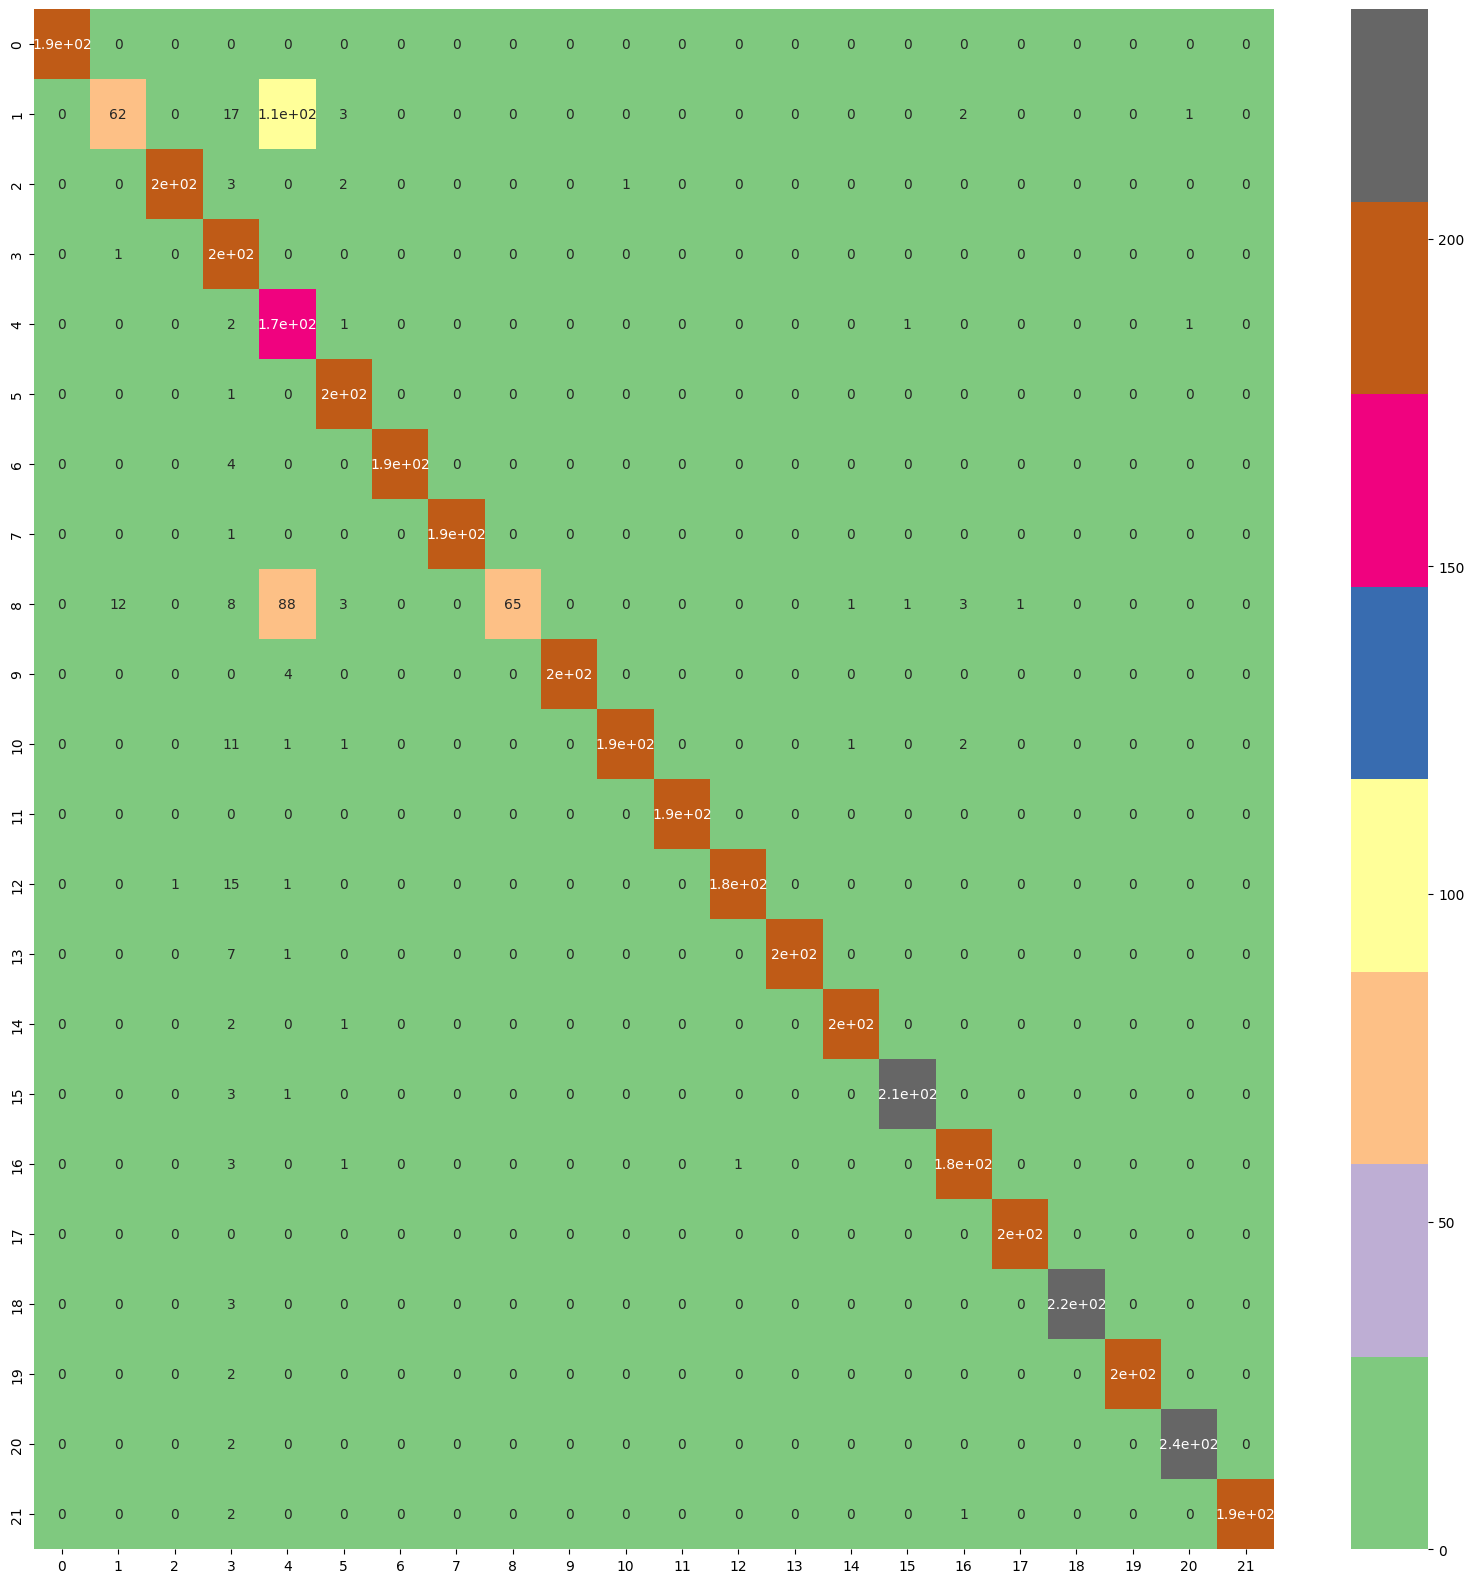

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap=plt.cm.Accent)

In [ ]:
fnl = pd.DataFrame(np.c_[y_test,pred],columns=['Actual','Predicted'])
fnl.head()

,Actual,Predicted
0,10,10
1,14,14
2,20,20
3,16,16
4,12,12


In [ ]:
# Saving the trained Multinomial Naive Bayes classifier to a file
import joblib
joblib.dump(classifier , 'language_identification.sav')

['language_identification.sav']

In [ ]:
model = joblib.load('language_identification.sav')

### Testing the model with new text

In [ ]:
def test_model(test_sentence):
    languages = {
    'Arabic' : 0,
    'Chinese' : 1,
    'Dutch' : 2,
    'English' : 3,
    'Estonian' : 4,
    'French' : 5,
    'Hindi' : 6,
    'Indonesian' : 7,
    'Japanese' : 8,
    'Korean' : 9,
    'Latin' : 10,
    'Persian' : 11,
    'Portugese' : 12,
    'Pushto' : 13,
    'Romanian' : 14,
    'Russian' : 15,
    'Spanish' : 16,
    'Swedish' : 17,
    'Tamil' : 18,
    'Thai' : 19,
    'Turkish' : 20,
    'Urdu' : 21
    }

    rev = re.sub('^[a-zA-Z]',' ',test_sentence)
    rev = rev.lower()
    rev = rev.split()
    rev = [stemmer.stem(word) for word in rev if word not in set(stopwords.words())]
    data_processed = ' '.join(rev)


    data_processed = cv.transform([data_processed]).toarray()
    output = model.predict(data_processed)[0]
    keys = list(languages)
    values = list(languages.values())
    position = values.index(output)
    output = keys[position]
    print(output)



In [ ]:
test_model('நாங்கள் நல்ல சிறுவர்கள்') # Tamil => Correct

Tamil


In [ ]:
test_model('พวกเราเป็นเด็กดี') # Thai => Correct

Thai


In [ ]:
test_model("life it's not easy at all ") # English => incorrect

Estonian


In [ ]:
test_model('in quo habitas')# English => Correct

Latin


In [ ]:
test_model(" WHy this model can't detect English language ")

English


## **Conclusion**
In this project, we developed a language identification system using Natural Language Processing and machine learning techniques. Through data preprocessing, we cleaned and transformed the text data into a numerical format suitable for model training.

We implemented the Multinomial Naive Bayes classifier and achieved an accuracy score of approximately 92.34% on the test set, demonstrating the model's effectiveness in identifying languages from text samples. This project highlights the potential of NLP in multilingual text processing and opens the door for future enhancements, such as exploring more advanced algorithms and expanding the dataset for broader language coverage.